# Image Processing CookBook
## Chapter 02
### Author: Sandipan Dey

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


# Даалгавар 
Тодорхойлсон зоосууд хоорондын зайг тодорхойлох

In [ ]:
# your code here

accuracy = np.sum(abs(noisy - blur))/(img.shape[0]*img.shape[1]*img.shape[2])
print("{0:.2f}%".format(100 - accuracy))

70.28%


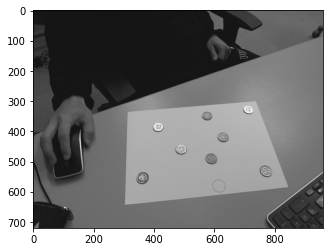

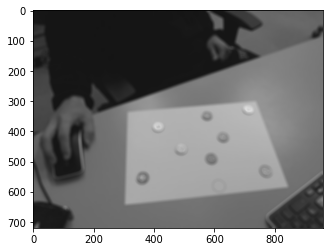

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

img = cv2.imread('images/coin_orig.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.show()

# noise=cv2.medianBlur(gray,5)
# plt.imshow(cv2.cvtColor(noise, cv2.COLOR_BGR2RGB))
# plt.show()
blur = cv2.bilateralFilter(gray, 15, 5900, 5900)
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.show()

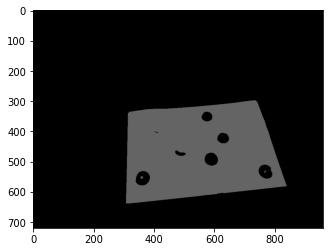

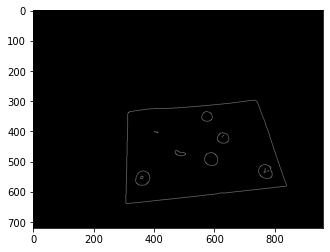

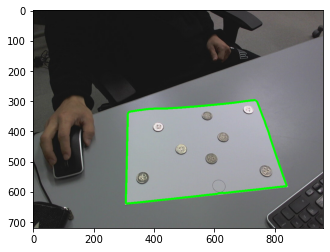

In [ ]:
import numpy as np

thresh = cv2.threshold(blur, 155, 100, 0)[1]
edged = cv2.Canny(thresh, 50, 100)
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#Configuration
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
plt.show()

cv2.drawContours(img, contours, -1, (0, 255, 0), 5)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()



(4, 2)
[742 303]
s=  1
742
303
318
336
307
637
837
582


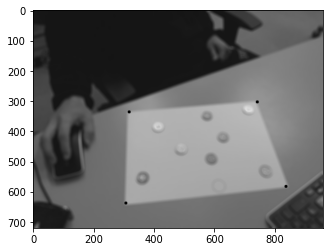

In [ ]:

# img = cv2.imread('images/coin_orig.jpg')
img = blur

perim = cv2.arcLength(contours[0], True)
# setting the precision
epsilon = 0.02*perim

approxCorners = cv2.approxPolyDP(contours[0], epsilon, True)
corners = np.array(approxCorners).reshape(4,2)
print(corners.shape)
print(corners[0])
print('s= ',len(contours))
for point in corners:
  cv2.circle(img, (point[0], point[1]), 5, (0,0,255), -1)
  print(point[0])
  print(point[1])
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
img1 = cv2.imread('images/coin_orig.jpg')

(720, 960, 3)
[[742. 303.]
 [837. 582.]
 [318. 336.]
 [307. 637.]]
[[  0.   0.]
 [720.   0.]
 [  0. 960.]
 [720. 960.]]


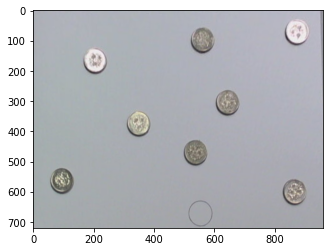

In [ ]:
wrapped_img = np.zeros((img.shape[0], img.shape[1], 3))
print(wrapped_img.shape)
dst = np.float32(np.array([[0,0], [wrapped_img.shape[0], 0], [0,wrapped_img.shape[1]], [wrapped_img.shape[0], wrapped_img.shape[1]]]))
src = np.array([corners[0], corners[3], corners[1], corners[2]])
src = np.float32(src)
print(src)
print(dst)

matrix = cv2.getPerspectiveTransform(src, dst)
result = cv2.warpPerspective(img1, matrix, (wrapped_img.shape[0], wrapped_img.shape[1]))



rot90 = cv2.rotate(result, cv2.ROTATE_180)
rot901 = cv2.rotate(rot90, cv2.ROTATE_90_COUNTERCLOCKWISE)
cv2.imwrite('coin.png',rot901)
plt.imshow(cv2.cvtColor(rot901, cv2.COLOR_BGR2RGB))
plt.show()

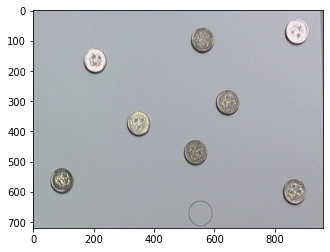

True

In [ ]:
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

image_sharp = cv2.filter2D(src=rot901, ddepth=-1, kernel=kernel)
plt.imshow(cv2.cvtColor(image_sharp, cv2.COLOR_BGR2RGB))
plt.show()
cv2.imwrite('coin.png',image_sharp)

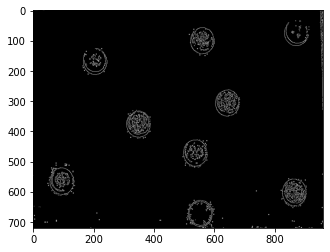

In [ ]:
t = cv2.threshold(image_sharp, 155, 100, 0)[1]
e = cv2.Canny(t, 50, 100)
plt.imshow(cv2.cvtColor(e, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import matplotlib.pyplot as plt
import numpy as np
import argparse
import imutils
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
def midpoint(ptA, ptB):
    return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)

In [ ]:
image = cv2.imread('coin.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7, 7), 0)

In [ ]:
edged = cv2.Canny(gray, 50, 100)
edged = cv2.dilate(edged, None, iterations=1)
edged = cv2.erode(edged, None, iterations=1)

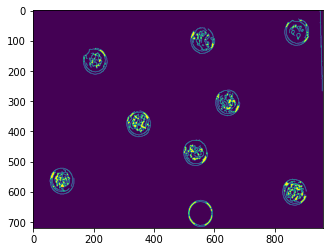

In [ ]:
plt.imshow(edged)
plt.show()

In [ ]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
                        cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [ ]:
(cnts, _) = contours.sort_contours(cnts)
colors = ((0, 0, 255), (240, 0, 159), (0, 165, 255), (255, 255, 0),
          (255, 0, 255))
refObj = None

In [ ]:
orig = image.copy()

In [ ]:
cm = []

In [ ]:
for c in cnts:
  if cv2.contourArea(c) < 100:
      continue
  box = cv2.minAreaRect(c)
  box = cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box)
  box = np.array(box, dtype="int")
  box = perspective.order_points(box)
  cX = np.average(box[:, 0])
  cY = np.average(box[:, 1])
  if refObj is None:      
    (tl, tr, br, bl) = box
    (tlblX, tlblY) = midpoint(tl, bl)
    (trbrX, trbrY) = midpoint(tr, br)
    D = dist.euclidean((tlblX, tlblY), (trbrX, trbrY))
    refObj = (box, (cX, cY), D / 22.6)
    continue
 
  cv2.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)
  cv2.drawContours(orig, [refObj[0].astype("int")], -1, (0, 255, 0), 2)
  refCoords = np.vstack([refObj[0], refObj[1]])
  objCoords = np.vstack([box, (cX, cY)])
  count = 0
  for ((xA, yA), (xB, yB), color) in zip(refCoords, objCoords, colors): 
      if count==4:
        cv2.circle(orig, (int(xA), int(yA)), 5, color, -1)
        cv2.circle(orig, (int(xB), int(yB)), 5, color, -1)
        cv2.line(orig, (int(xA), int(yA)), (int(xB), int(yB)), color, 2)
        D = dist.euclidean((xA, yA), (xB, yB)) / refObj[2]
        print(D)
        (mX, mY) = midpoint((xA, yA), (xB, yB))
        print((xA, yA), (xB, yB), (mX, mY))
        cm.append(D)
        cv2.putText(orig, "{:.1f}mm".format(D), (int(mX), int(mY -10)), cv2.FONT_HERSHEY_SIMPLEX, 0.55, color, 2)
        cv2.waitKey(0)
      count = count+1
cv2.destroyAllWindows()

0.0
(95.5, 564.5) (95.5, 564.5) (95.5, 564.5)
1.5750422477722168
(95.5, 564.5) (92.0, 560.25) (93.75, 562.375)
6.50154422325424
(95.5, 564.5) (113.0, 550.0) (104.25, 557.25)
117.53727386088312
(95.5, 564.5) (205.0, 168.5) (150.25, 366.5)
90.57229336122924
(95.5, 564.5) (349.5, 375.5) (222.5, 470.0)
128.96386386533328
(95.5, 564.5) (536.5, 471.0) (316.0, 517.75)
134.69021073353443
(95.5, 564.5) (554.0, 671.5) (324.75, 618.0)
187.9744928673853
(95.5, 564.5) (560.0, 99.75) (327.75, 332.125)
173.04687731779075
(95.5, 564.5) (642.5, 306.25) (369.0, 435.375)
220.37957840931568
(95.5, 564.5) (865.0, 600.75) (480.25, 582.625)
263.0954809261274
(95.5, 564.5) (872.5, 72.5) (484.0, 318.5)
220.8183830164656
(95.5, 564.5) (866.5, 601.5) (481.0, 583.0)


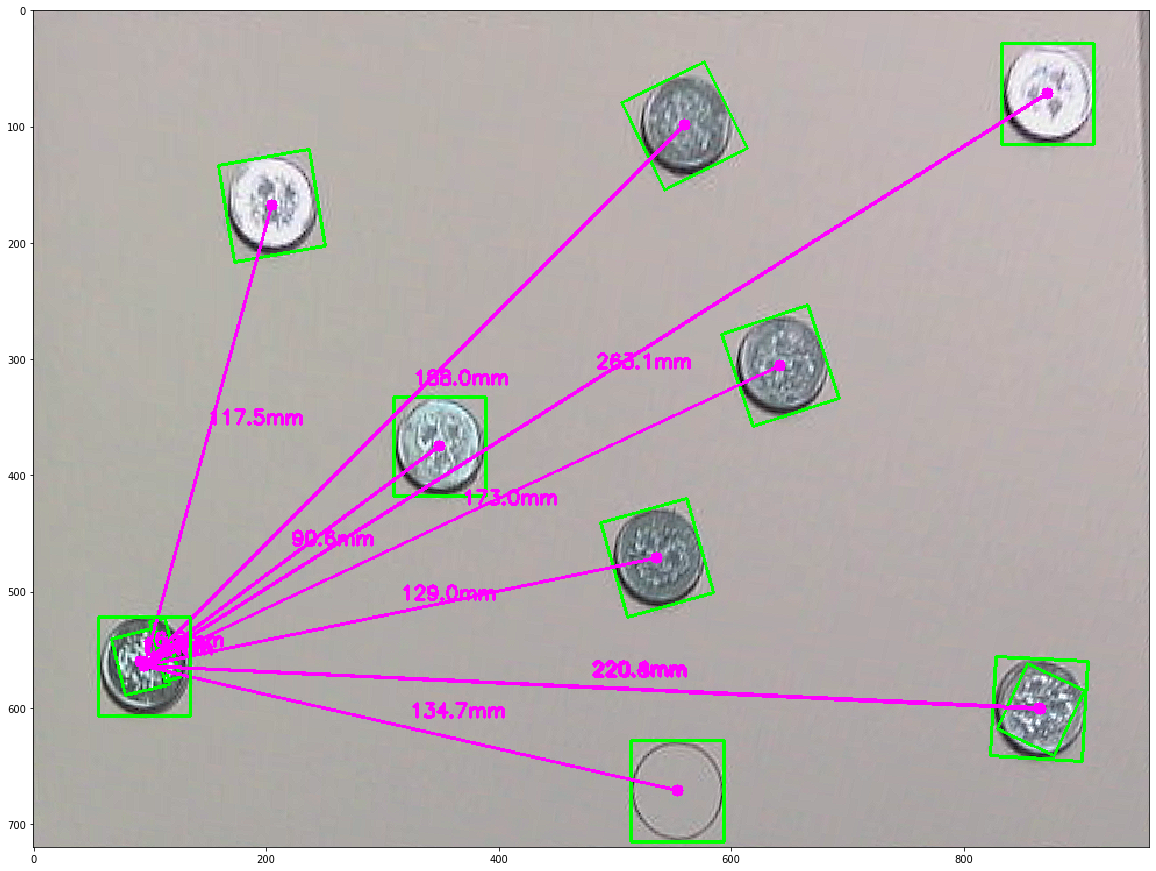

In [ ]:
plt.figure(figsize = (20,20))
plt.imshow(orig, interpolation='nearest')
plt.show()

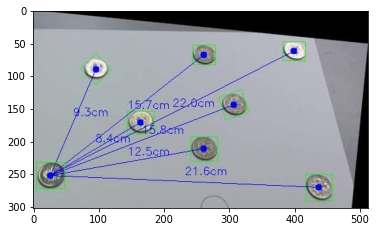

In [ ]:
img = imread('images/calibrated.jpg')
plt.imshow(img)
plt.show()

In [ ]:
distance=[11.7, 9.5, 19.7, 13.8, 18.5, 28, 23.5]

# Result
Ground truth бодит амьдрал дээрхи хэмжсэн зай

Calculated distance тооцоолж олсон зай

Loss алдаа

| Objects | Calculated distance[cm] |Ground truth[cm]|Loss [cm]|
|---------|------------------------------------------------|------|-----|
| 1-2     | 9.3                                            | 11.7 | 2.4 |
| 1-3     | 8.4                                            | 9.5  | 1.1 |
| 1-4     | 15.7                                           | 19.7 | 4.0 |
| 1-5     | 12.5                                           | 13.8 | 1.3 |
| 1-6     | 15.8                                           | 18.5 | 2.7 |
| 1-7     | 22                                             | 28   | 6   |
| 1-8     | 21.6                                           | 23.5 | 2.1 |

In [ ]:
cm.sort()
cm

[0.0,
 1.5750422477722168,
 6.50154422325424,
 90.57229336122924,
 117.53727386088312,
 128.96386386533328,
 134.69021073353443,
 173.04687731779075,
 187.9744928673853,
 220.37957840931568,
 220.8183830164656,
 263.0954809261274]

In [ ]:
cm.pop(9)
cm.pop(2)
cm.pop(1)
cm.pop(0)
cm.pop(2)

128.96386386533328

In [ ]:
cm

[90.57229336122924,
 117.53727386088312,
 134.69021073353443,
 173.04687731779075,
 187.9744928673853,
 220.8183830164656,
 263.0954809261274]

In [ ]:
distance.sort()
distance

[9.5, 11.7, 13.8, 18.5, 19.7, 23.5, 28]

In [ ]:
loss = []
for i in range(0, len(distance)):
  loss.append(distance[i]-(cm[i]/10))

In [ ]:
loss

[0.4427706638770754,
 -0.053727386088311846,
 0.3309789266465586,
 1.195312268220924,
 0.9025507132614692,
 1.4181616983534404,
 1.6904519073872635]

OpenCV зоосны зайг илрүүлэх

OpenCV ашиглан зоос хоорондын зайг олох нь хэд хэдэн үе шаттай. Нэгдүгээрт, зоосны зургийг программд ачаалах ёстой. Үүнийг OpenCV-ийн imread функцийг ашиглан хийж болно, энэ нь зургийн файлыг уншиж, пикселийн утгын матрицыг буцаадаг.

Дараа нь зоосны шинж чанарыг сайжруулахын тулд зургийг урьдчилан боловсруулдаг. Энэ нь ихэвчлэн зургийг саарал өнгөтэй болгон хувиргах, аливаа чимээ шуугианыг арилгахын тулд Гауссын бүдэгрүүлэх аргыг хэрэглэх, мөн зургийг бүс болгон хуваахын тулд threshold ашиглах зэрэг орно.

Зургийг урьдчилан боловсруулсны дараа програм нь OpenCV-ийн findContours функцийг ашиглан зоосны контурыг илрүүлэх боломжтой. Энэ функц нь зураг дээрх холбогдсон мужуудын хил хязгаарыг тодорхойлж, контурын жагсаалтыг буцаадаг бөгөөд тэдгээр нь тус бүрийг цэгийн цуваа хэлбэрээр илэрхийлдэг.

Зоос хоорондын зайг тодорхойлохын тулд програм нь эхлээд ямар зоостой ямар контур тохирохыг тодорхойлох ёстой. Үүнийг контур бүрийн хэмжээг хэмжиж, зурган дээрх зоосны хүлээгдэж буй хэмжээтэй харьцуулах замаар хийж болно.

Контурыг харгалзах зоосон мөнгөтэй нь тааруулсны дараа программ нь тэдгээрийн хоорондох зайг тооцоолж болно. Нэг нийтлэг арга бол хоёр хэмжээст орон зайн хоёр цэгийн хоорондох зайг тооцоолох зайны томъёог ашиглах явдал юм.

Зайны томъёог ашиглахын тулд програм нь зоос бүрийн төвүүдийн координатыг мэдэх шаардлагатай. Үүнийг OpenCV-ийн моментийн функцийг ашиглан контур бүрийн төвийг олох замаар тооцоолж болно.

Эцэст нь уг программ нь хос зоос бүрийн центроид хоорондын зайг тооцоолохдоо зайны томъёог ашиглаж болно. Үүний үр дүнд хоёр зоосны төв хоорондын зай гарах бөгөөд энэ нь зураг дээрх зоосны тоог тоолох эсвэл үзэгдэл дэх объектын байршлыг илрүүлэх зэрэг олон төрлийн хэрэглээнд хэрэг болно.